In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from nilearn import datasets, plotting
import nibabel as nib
import matplotlib as mpl

import sys; sys.path.append('../')
from src.tools import get_files, get_latents
# from src.plotting import visualize_embeddings, make_cbar

# import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
# import seaborn as sns
# sns.set(color_codes=True, style='white', context='talk', font_scale=1)
# PALETTE = sns.color_palette("Set1")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
def visualize_groups(groups, n_embed=3, hemi='left', view='lateral', stat=np.mean, save_file=None):
    """
    groups : list, shape (6,)
        All six state by trait pairs. Assumed in order returned
        by 'get_latents' for labeling purposes.
    """
    fsa5 = datasets.fetch_surf_fsaverage()
    external_dir = '../data/external/'
    if hemi == 'left':
        cortex = nib.freesurfer.read_label(external_dir + 'lh.cortex.label')
        plot = fsa5.infl_left
    elif hemi == 'right':
        cortex = nib.freesurfer.read_label(external_dir + 'rh.cortex.label')
        plot = fsa5.infl_right
    
    ylabels = [
        'Expert\nResting State',
        'Expert\nOpen Monitoring',
        'Expert\nCompassion',
        'Novice\nResting State',
        'Novice\nOpen Monitoring',
        'Novice\nCompassion',
    ]

    plt.clf()
    res_scale = 2
    fig, axes = plt.subplots(n_embed, 6, subplot_kw={'projection': '3d'}, figsize=(res_scale*7, res_scale*n_embed))
    if n_embed==1:
        axes = [axes]
    plt.subplots_adjust(wspace=0, hspace=0)    

    groups = np.asarray([stat(g, axis=0) for g in groups])
    for r, row in enumerate(axes):
        vmax = np.max(np.abs(groups[:, :len(cortex), r]))
        for c, ax in enumerate(row):
            conn_map = np.zeros(10242)
            conn_map[cortex] = groups[c, :len(cortex), r]

            plotting.plot_surf_stat_map(plot,
              conn_map, hemi=hemi, colorbar=(c==len(row)-1), cmap='RdBu_r', view=view, axes=ax, 
                vmax=vmax, symmetric_cbar=True)
            if r == 0:
                ax.annotate(ylabels[c], xy = (0.5,1), xycoords='axes fraction', ha='center', fontsize=14)

        row[0].annotate(
            f'Gradient {r+1}', xy = (0,0.5), xycoords='axes fraction',
            rotation='vertical', va='center', fontsize=14)
        
    if save_file:
        plt.savefig(save_file, format='pdf', bbox_inches='tight')
    else:
        plt.show()

## GCCA embeddings

In [ ]:
path = Path('/mnt/ssd3/ronan/data/gcca_07-09-12:06_min_rank_ZG3')
flag = f"_gcca"
ftype = "h5"
source='gcca'

groups, labels, subjs = get_latents(
    path, flag=flag, ids=True, ftype=ftype, source=source, as_groups=True
)

<Figure size 432x288 with 0 Axes>

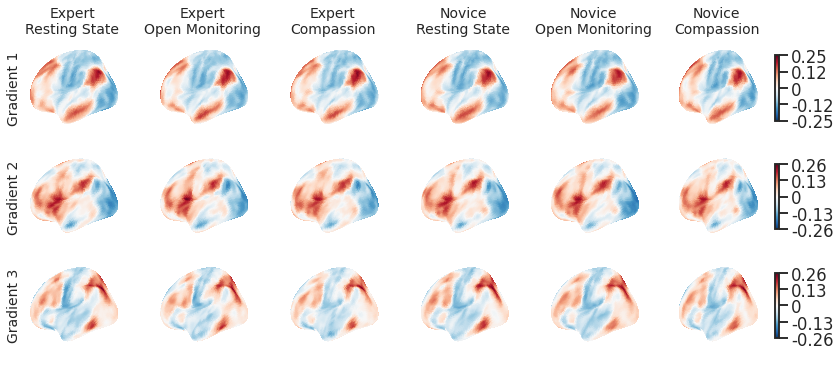

In [95]:
save_file = '../reports/figures/DCORR_gcca_raw_ZG3-min_normed/DCORR_gcca_raw_ZG3-min_normed_mean-gradients.pdf'
visualize_groups(groups, n_embed=3, stat=np.mean, save_file=save_file)

<Figure size 432x288 with 0 Axes>

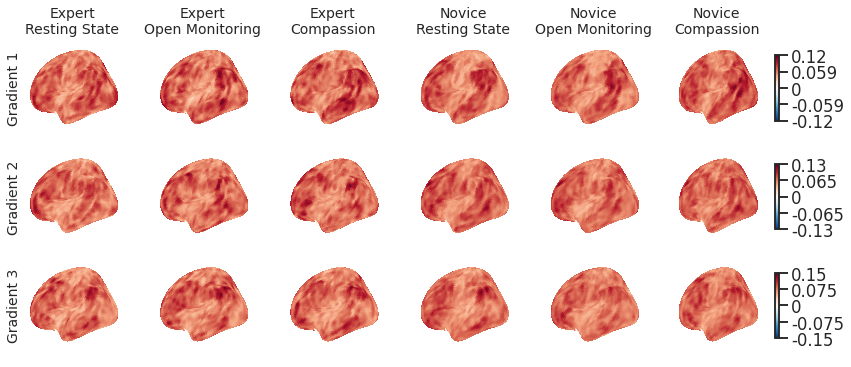

In [96]:
save_file = '../reports/figures/DCORR_gcca_raw_ZG3-min_normed/DCORR_gcca_raw_ZG3-min_normed_std-gradients.pdf'
visualize_groups(groups, n_embed=3, stat=np.std, save_file=save_file)

## dmap embeddings

In [103]:
path = Path('/mnt/ssd3/ronan/data/dmap_replication-csv_align-5_01-09')
flag = '_dmap'
ftype = 'h5'
source='gcca'

groups, labels, subjs = get_latents(
    path, flag=flag, ids=True, ftype=ftype, source=source, as_groups=True
)

<Figure size 432x288 with 0 Axes>

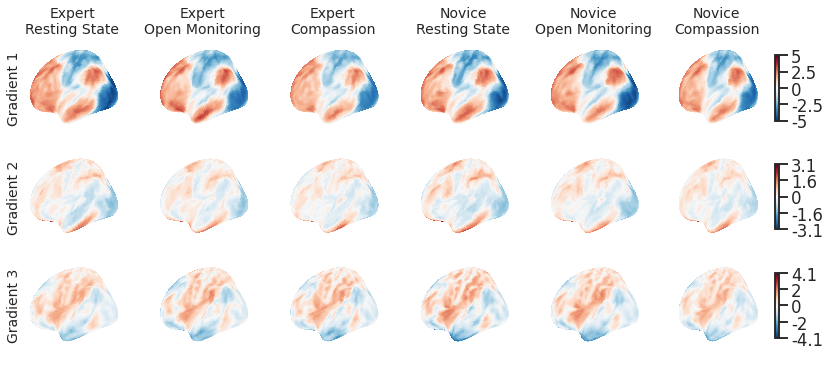

In [104]:
save_file = '../reports/figures/DCORR_dmap_mapalign_replication-csv_align-5_01-09/DCORR_dmap_mapalign_replication-csv_align-5_01-09_mean-gradients.pdf'
visualize_groups(groups, n_embed=3, stat=np.mean, save_file=save_file)

<Figure size 432x288 with 0 Axes>

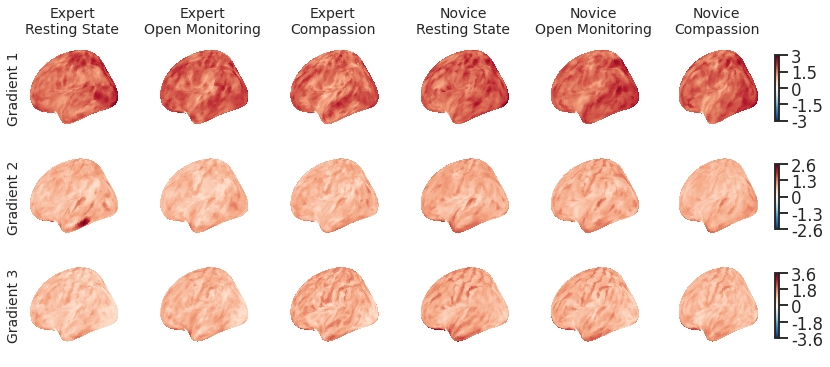

In [105]:
save_file = '../reports/figures/DCORR_dmap_mapalign_replication-csv_align-5_01-09/DCORR_dmap_mapalign_replication-csv_align-5_01-09_std-gradients.pdf'
visualize_groups(groups, n_embed=3, stat=np.std, save_file=save_file)